## Pandas Crash Course (Part 5)

### Importing Time Series Data from csv-Files

In [1]:
import pandas as pd

In [2]:
temp = pd.read_csv("temp.csv", parse_dates=["datetime"], index_col= "datetime")

In [3]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [5]:
type(temp.iloc[0, 0])

numpy.float64

In [6]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [7]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

### Converting strings to datetime objects with pd.to_datetime()

In [8]:
import pandas as pd

In [9]:
temp = pd.read_csv("temp.csv")

In [10]:
temp.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [12]:
temp.datetime[0]

'2013-01-01 00:00:00'

In [ ]:
pd.to_datetime(temp.datetime)

In [13]:
temp = temp.set_index(pd.to_datetime(temp.datetime)).drop("datetime", axis = 1)

In [14]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [ ]:
temp.info()

In [ ]:
temp.index[0]

In [ ]:
pd.to_datetime("2015-05-20 10:30:20")

In [ ]:
pd.to_datetime("20150520")

In [ ]:
pd.to_datetime("2015/05/20")

In [ ]:
pd.to_datetime("2015 05 20")

In [ ]:
#pd.to_datetime("2015-20-05")

In [ ]:
pd.to_datetime("2015 May 20")

In [ ]:
pd.to_datetime("May 2015 20")

In [ ]:
pd.to_datetime("2015 20th may")

In [ ]:
pd.to_datetime(["2015-05-20", "Feb 20 2015"])

In [ ]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], errors="coerce")

### Initial Analysis / Visual Inspection of Time Series

In [15]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [16]:
temp.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [17]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [18]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [19]:
temp.LA.value_counts()

 16.2    238
 16.7    237
 15.2    234
 18.2    231
 16.6    228
        ... 
-5.9       1
-6.5       1
-6.6       1
-2.2       1
-3.3       1
Name: LA, Length: 442, dtype: int64

In [20]:
import matplotlib.pyplot as plt

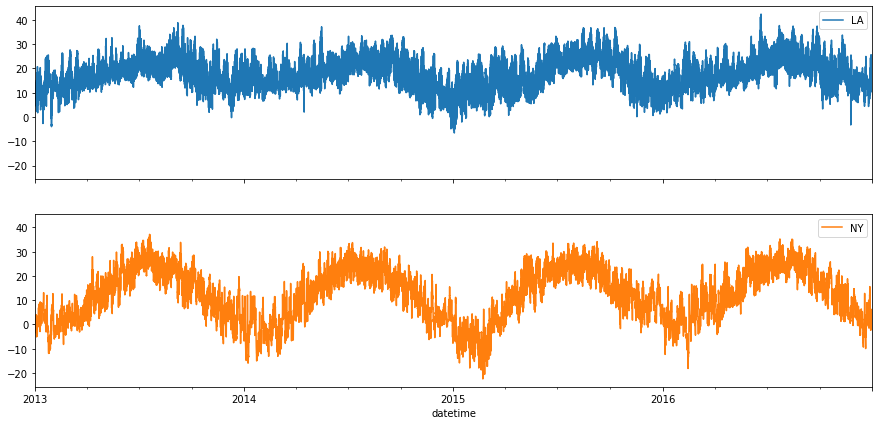

In [22]:
temp.plot(figsize = (15, 7), subplots=True, sharey=True)
plt.show()

### Indexing and Slicing Time Series

In [ ]:
import pandas as pd

In [23]:
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col= "datetime")

In [24]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [25]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [26]:
temp.loc["2013-01-01 01:00:00"]

LA    10.7
NY    -1.7
Name: 2013-01-01 01:00:00, dtype: float64

In [27]:
temp.loc["2015"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [28]:
temp.loc["2015-05"]

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2
2015-05-01 04:00:00,20.1,8.6
...,...,...
2015-05-31 19:00:00,25.4,25.5
2015-05-31 20:00:00,26.0,23.9
2015-05-31 21:00:00,24.9,22.5


In [29]:
temp.loc["2015-05-20"].shape

(24, 2)

In [30]:
temp.loc["2015-05-20 10:00:00"]

LA     7.8
NY    13.3
Name: 2015-05-20 10:00:00, dtype: float64

In [ ]:
#temp.loc["2015-05-20 10:30:00"]

In [ ]:
temp.loc["2015-01-01" : "2015-12-31"]

In [34]:
temp.loc["2015-01-01" : "2015-12-31"].equals(temp.loc["2015"])

True

In [ ]:
temp.loc["2015-04-15" : "2016-02-23"]

In [ ]:
temp.loc["2015-05-20":]

In [ ]:
temp.loc[:"2015-05-20"]

In [ ]:
temp.loc["20FEBRUARY2015"]

In [ ]:
#temp.loc[["2015-05-20 10:00:00", "2015-05-20 12:00:00"]]

In [36]:
two_timestamps = pd.to_datetime(["2015-05-20 10:00:00", "2015-05-20 12:00:00"])
two_timestamps

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [40]:
temp.loc[two_timestamps]

,LA,NY
2015-05-20 10:00:00,7.8,13.3
2015-05-20 12:00:00,9.7,13.6
